Test cases from this list are prepended with "A" - Other notebooks specifying additional tests should prepend with "B", "C", "D", etc

Basic
1. ALA_ALA (cterm cap/nterm cap/charged terms)
2. ALA_ALA (uncapped)
3. HIS_PRO (diff protonation states)
4. CYX_ALA_ALA_CYX
5. ALA_ASP/ASH
6. ALA_LYS/LYN
7. ALA_ALA LIG
8. ALA ALA (one/two chains, one/two molecules, maybe TER between)
9. ALA ALA (differ only by insertion code)
10. ALA ALA (same residue info, noncontiguous)
11. Deprotonated SER and CYX
12. Chelated metal
13. D amino acids (not clear if we should check stereo?)
14. phosphotyrosine (TPO)


Harder
1. ALA_ALA LIG
2. covalent ligand
3. AMBER residue names

Scoring metric
* Same canonical isomeric SMILES
     * Each test should have a "PDB" input and a "reference" input for comparison. 
     * If the reference input is a SMILES doesn't need to be canonicalized
* PDB files MAY have CONECT lines. If so, the test will be run twice, with one run stripping that input
* Ligands will always be called HETATM

# Test case generation
A1

In [33]:
os.mkdir?

In [1]:
import os
try:
    os.mkdir('A1')
except:
    pass

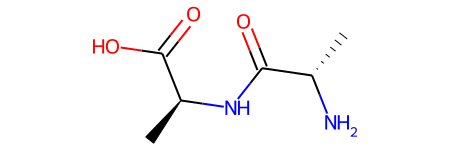

In [2]:
from rdkit import Chem
mol = Chem.MolFromFASTA('AA')
#mol = Chem.AddHs(mol, addResidueInfo=True)
mol

In [3]:
from rdkit.Chem import AllChem 

a1 = Chem.AddHs(mol, addResidueInfo=True)
AllChem.EmbedMolecule(a1, AllChem.ETKDG())
Chem.MolToPDBFile(a1, "A1/A1_neutral.pdb")
Chem.MolToMolFile(a1, "A1/A1_neutral_reference.mol")

In [4]:
[i for i in dir(AllChem) if "3" in i]

['AssignStereochemistryFrom3D',
 'CalcAUTOCORR3D',
 'CalcChi3n',
 'CalcChi3v',
 'CalcFractionCSP3',
 'CalcKappa3',
 'CalcPMI3',
 'ETKDGv3',
 'GenerateDepictionMatching3DStructure',
 'Get3DDistanceMatrix',
 'GetCrippenO3A',
 'GetCrippenO3AForProbeConfs',
 'GetO3A',
 'GetO3AForProbeConfs',
 'MolToV3KMolBlock',
 'MolToV3KMolFile',
 'O3A',
 'ReactionToV3KRxnBlock',
 'srETKDGv3']

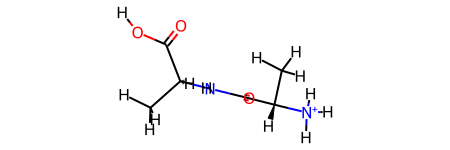

In [5]:
rxn = Chem.rdChemReactions.ReactionFromSmarts(
    #"[N:1]([H:2])([H:3])[CX4:4] >> [N+:1]([H:2])([H:3])([H])[CX4:4]"
    "[NH2:1][CX4:2] >> [NH3+:1][CX4:2]"
)
products = rxn.RunReactants([mol])

product = products[0][0]
# Ensure that there's only one chemical structure that comes from the reaction
assert len(set([Chem.MolToSmiles(i[0]) for i in products])) == 1, len(products)
assert len(products) == 1
Chem.SanitizeMol(product)
#for atom in product.GetAtoms():
#    if atom.GetPDBResidueInfo() is None:
#        for neighbor in atom.GetNeighbors():
#            atom.SetPDBResidueInfo(neighbor.GetPDBResidueInfo())

product = Chem.AddHs(product, addResidueInfo=True)
AllChem.EmbedMolecule(product, AllChem.ETKDG())
Chem.MolToPDBFile(product, "A1/A1_nterm_charge.pdb")
Chem.MolToMolFile(product, "A1/A1_nterm_charge_reference.mol")
product

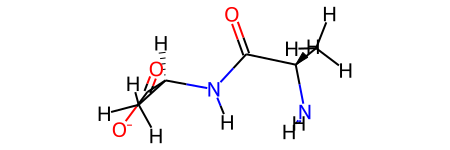

In [6]:
rxn = Chem.rdChemReactions.ReactionFromSmarts(
    #"[N:1]([H:2])([H:3])[CX4:4] >> [N+:1]([H:2])([H:3])([H])[CX4:4]"
    "[O;$(OC=O):1] >> [O-1:1]"
)
products = rxn.RunReactants([mol])

product = products[0][0]
# Ensure that there's only one chemical structure that comes from the reaction
assert len(set([Chem.MolToSmiles(i[0]) for i in products])) == 1, len(products)
assert len(products) == 1
Chem.SanitizeMol(product)
#for atom in product.GetAtoms():
#    if atom.GetPDBResidueInfo() is None:
#        for neighbor in atom.GetNeighbors():
#            atom.SetPDBResidueInfo(neighbor.GetPDBResidueInfo())

product = Chem.AddHs(product, addResidueInfo=True)
AllChem.EmbedMolecule(product, AllChem.ETKDG())
Chem.MolToPDBFile(product, "A1/A1_cterm_charge.pdb")
Chem.MolToMolFile(product, "A1/A1_cterm_charge_reference.mol")
product

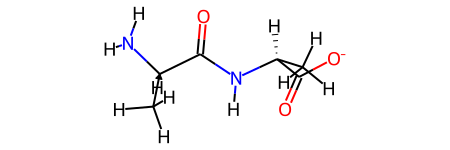

In [7]:
rxn = Chem.rdChemReactions.ReactionFromSmarts(
    #"[N:1]([H:2])([H:3])[CX4:4] >> [N+:1]([H:2])([H:3])([H])[CX4:4]"
    "[O;$(OC=O):1] >> [O-1:1]"
)
products = rxn.RunReactants([mol])

product = products[0][0]
# Ensure that there's only one chemical structure that comes from the reaction
assert len(set([Chem.MolToSmiles(i[0]) for i in products])) == 1, len(products)
assert len(products) == 1
Chem.SanitizeMol(product)
#for atom in product.GetAtoms():
#    if atom.GetPDBResidueInfo() is None:
#        for neighbor in atom.GetNeighbors():
#            atom.SetPDBResidueInfo(neighbor.GetPDBResidueInfo())

product = Chem.AddHs(product, addResidueInfo=True)
AllChem.EmbedMolecule(product, AllChem.ETKDG())
Chem.MolToPDBFile(product, "A1/A1_nterm_cap.pdb")
Chem.MolToMolFile(product, "A1/A1_nterm_cap_reference.mol")
product

In [8]:
print(Chem.MolToPDBBlock(product))

ATOM      1  OXT ALA A   2       3.657   0.432  -1.433  1.00  0.00           O1-
ATOM      2  C   ALA A   2       2.522  -0.164  -0.932  1.00  0.00           C  
ATOM      3  CA  ALA A   2       1.804   0.415   0.236  1.00  0.00           C  
ATOM      4  O   ALA A   2       2.067  -1.218  -1.457  1.00  0.00           O  
ATOM      5  N   ALA A   2       0.478  -0.203   0.353  1.00  0.00           N  
ATOM      6  CB  ALA A   2       2.636   0.154   1.472  1.00  0.00           C  
ATOM      7  C   ALA A   1      -0.692   0.576   0.277  1.00  0.00           C  
ATOM      8  CA  ALA A   1      -2.010  -0.069   0.398  1.00  0.00           C  
ATOM      9  O   ALA A   1      -0.585   1.805   0.107  1.00  0.00           O  
ATOM     10  N   ALA A   1      -3.042   0.932   0.288  1.00  0.00           N  
ATOM     11  CB  ALA A   1      -2.220  -1.128  -0.666  1.00  0.00           C  
ATOM     12  H1  ALA A   2       1.717   1.496   0.091  1.00  0.00           H  
ATOM     13  H2  ALA A   2  

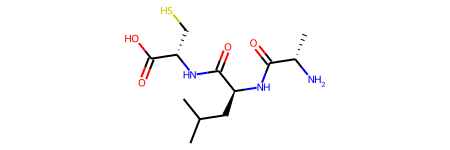

In [9]:
Chem.MolFromHELM('PEPTIDE1{A.L.C}$$$$')

In [10]:
mol3 = Chem.MolFromHELM('PEPTIDE1{[ac].A.[am]}$$$$')
a1 = Chem.AddHs(mol3, addResidueInfo=True)
AllChem.EmbedMolecule(a1, AllChem.ETKDG())
Chem.MolToPDBFile(a1, "A1/A1_ace_am.pdb")
Chem.MolToMolFile(a1, "A1/A1_ace_am_reference.mol")
#print(Chem.MolToPDBBlock(a1))

In [11]:
mol3 = Chem.MolFromHELM('PEPTIDE1{[ac].A}$$$$')
a1 = Chem.AddHs(mol3, addResidueInfo=True)
AllChem.EmbedMolecule(a1, AllChem.ETKDG())
Chem.MolToPDBFile(a1, "A1/A1_ace_nme.pdb")
Chem.MolToMolFile(a1, "A1/A1_ace_nme_reference.mol")
print(Chem.MolToPDBBlock(a1))

HETATM    1  C   ACE A  -1       1.681   0.318  -0.050  1.00  0.00           C  
HETATM    2  O   ACE A  -1       1.656   0.885  -1.185  1.00  0.00           O  
HETATM    3  CH3 ACE A  -1       2.977   0.194   0.667  1.00  0.00           C  
ATOM      4  N   ALA A   1       0.455  -0.158   0.450  1.00  0.00           N  
ATOM      5  CA  ALA A   1      -0.781  -0.012  -0.288  1.00  0.00           C  
ATOM      6  C   ALA A   1      -1.729   0.747   0.549  1.00  0.00           C  
ATOM      7  O   ALA A   1      -1.377   1.133   1.683  1.00  0.00           O  
ATOM      8  CB  ALA A   1      -1.401  -1.355  -0.618  1.00  0.00           C  
ATOM      9  OXT ALA A   1      -3.003   1.029   0.073  1.00  0.00           O  
HETATM   10  H1  ACE A  -1       3.483   1.193   0.660  1.00  0.00           H  
HETATM   11  H2  ACE A  -1       2.831  -0.204   1.672  1.00  0.00           H  
HETATM   12  H3  ACE A  -1       3.586  -0.561   0.098  1.00  0.00           H  
ATOM     13  H1  ALA A   1  